In [1]:
%%writefile radial_gradient_header.py
import random; from IPython.display import display,HTML
from IPython.core.magic import register_line_magic
@register_line_magic
def radial_gradient_header(params):
    randi=str(random.randint(1,9999999))
    params=params.split('|'); string=params[0]
    if len(params)==1: 
        font_size=str(30); font_family='Ewert'
    elif len(params)==2: 
        font_size=params[1]; font_family='Ewert'
    else:
        font_size=params[1]; font_family=params[2]
    html_str="""<style>@import 'https://fonts.googleapis.com/css?"""+\
    """family="""+font_family+"""'; #div"""+randi+\
    """ {background:white; padding:2px;}
    .textrg {display:inline-block; font-size:"""+font_size+\
    """px; line-height:1.1; padding:5px; font-family:"""+font_family+\
    """,sans-serif; text-transform:uppercase;
       background:radial-gradient(
           circle farthest-corner at center center,
           orange,magenta,cyan) no-repeat;
       -webkit-background-clip:text;
       -webkit-text-fill-color:transparent;}</style>
    <div id='div"""+randi+"""'><text class='textrg'>"""+string+\
    """</text></div>"""
    display(HTML(html_str))

Writing radial_gradient_header.py


[📑 Google Colaboratory Version](https://colab.research.google.com/drive/1UXD9nxTS9s2EGkiRst59NREqX9Eiw3Zp)

In [2]:
%run radial_gradient_header.py
%radial_gradient_header Code Modules & Functions

In [3]:
import numpy as np,pylab as pl,pandas as pd
import h5py,tensorflow as tf,tensorflow_hub as th
from IPython.display import display
from sklearn.model_selection import train_test_split
fpath1='../input/traditional-decor-patterns/'
fpath2='../input/classification-of-handwritten-letters/'
fpath3='../input/flower-color-images/'
model_weights='/checkpoints'

In [4]:
def prepro(images,labels):
    x_train,x_test,y_train,y_test=train_test_split(
        images,labels,test_size=.2,random_state=1)
    n=int(len(x_test)/2)    
    x_valid,y_valid=x_test[:n],y_test[:n]
    x_test,y_test=x_test[n:],y_test[n:]
    df=pd.DataFrame([[x_train.shape,x_valid.shape,x_test.shape],
                     [y_train.shape,y_valid.shape,y_test.shape]],
                    columns=['train','valid','test'],
                    index=['images','labels'])
    display(df)
    return [[x_train,x_valid,x_test],
            [y_train,y_valid,y_test]]
def display_resize(x_train,x_valid,x_test,y_valid,img_size):
    x_train=tf.image.resize(x_train,[img_size,img_size])
    x_valid=tf.image.resize(x_valid,[img_size,img_size])
    x_test=tf.image.resize(x_test,[img_size,img_size])
    img=x_valid[1]
    lbl='one example of resized images \nlabel: '+\
     str(y_valid[1][0])+'\nshape: '+str(img.shape)
    pl.imshow(img); pl.tight_layout()
    pl.title(lbl); pl.show();
    return [x_train,x_valid,x_test]
def premodel(img_size,dense,model_handle,num_classes):
    model=tf.keras.Sequential([
        tf.keras.layers.Input((img_size,img_size,3),name='input'),
        th.KerasLayer(model_handle,trainable=True),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(dense),
        tf.keras.layers.LeakyReLU(alpha=.02),
        tf.keras.layers.Dropout(rate=.5),
        tf.keras.layers.Dense(num_classes,activation='softmax')])
    model.compile(optimizer='adam',metrics=['accuracy'],
                  loss='sparse_categorical_crossentropy')
    display(model.summary())
    return model
def cb(mw):
    early_stopping=tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',patience=20,verbose=2)
    checkpointer=tf.keras.callbacks.ModelCheckpoint(
        filepath=mw,save_best_only=True,save_weights_only=True,
        verbose=2,monitor='val_accuracy',mode='max')
    lr_reduction=tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',verbose=2,patience=5,factor=.8)
    return [checkpointer,early_stopping,lr_reduction]

In [5]:
%radial_gradient_header Data Loading & Preprocessing <br/> Set #1
f=h5py.File(fpath1+'DecorColorImages.h5','r') 
keys=list(f.keys()); print(keys)
images=np.array(f[keys[2]]).astype('float32')/255
labels=np.array(f[keys[1]]).astype('int32').reshape(-1,1)-1
[[x_train1,x_valid1,x_test1],
 [y_train1,y_valid1,y_test1]]=prepro(images,labels)
del images,labels

['countries', 'decors', 'images', 'types']


,train,valid,test
images,"(388, 150, 150, 3)","(48, 150, 150, 3)","(49, 150, 150, 3)"
labels,"(388, 1)","(48, 1)","(49, 1)"


In [6]:
%radial_gradient_header Set #2
f=h5py.File(fpath2+'LetterColorImages_123.h5','r') 
keys=list(f.keys()); print(keys)
images=np.array(f[keys[1]]).astype('float32')/255
labels=np.array(f[keys[2]]).astype('int32').reshape(-1,1)-1
[[x_train2,x_valid2,x_test2],
 [y_train2,y_valid2,y_test2]]=prepro(images,labels)
del images,labels

['backgrounds', 'images', 'labels']


,train,valid,test
images,"(11352, 32, 32, 3)","(1419, 32, 32, 3)","(1419, 32, 32, 3)"
labels,"(11352, 1)","(1419, 1)","(1419, 1)"


In [7]:
%radial_gradient_header Set #3
f=h5py.File(fpath3+'FlowerColorImages.h5','r') 
keys=list(f.keys()); print(keys)
images=np.array(f[keys[0]]).astype('float32')/255
labels=np.array(f[keys[1]]).astype('int32').reshape(-1,1)
[[x_train3,x_valid3,x_test3],
 [y_train3,y_valid3,y_test3]]=prepro(images,labels)
del images,labels

['images', 'labels']


,train,valid,test
images,"(168, 128, 128, 3)","(21, 128, 128, 3)","(21, 128, 128, 3)"
labels,"(168, 1)","(21, 1)","(21, 1)"


In [8]:
%radial_gradient_header Set #4
(x_train4,y_train4),(x_test4,y_test4)=\
tf.keras.datasets.cifar10.load_data()
x_train4,x_test4=x_train4/255,x_test4/255
x_valid4,x_test4,y_valid4,y_test4=train_test_split(
    x_test4,y_test4,test_size=.5,random_state=1)
df=pd.DataFrame([[x_train4.shape,x_valid4.shape,x_test4.shape],
                 [y_train4.shape,y_valid4.shape,y_test4.shape]],
                columns=['train','valid','test'],
                index=['images','labels'])
display(df)

170500096/170498071 [==============================] - 2s 0us/step


,train,valid,test
images,"(50000, 32, 32, 3)","(5000, 32, 32, 3)","(5000, 32, 32, 3)"
labels,"(50000, 1)","(5000, 1)","(5000, 1)"


In [9]:
%radial_gradient_header Pre-Trained Saved Models <br/> Set #1
[handle_base,img_size]=['mobilenet_v2_100_192',192]
model_handle='https://tfhub.dev/google/imagenet/'+\
             '{}/feature_vector/4'.format(handle_base)

In [10]:
model=premodel(img_size,1024,model_handle,7)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1311744   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 7175      
Total params: 3,576,903
Trainable params: 3,542,791
Non-trainable params: 34,112
_________________________________________

None

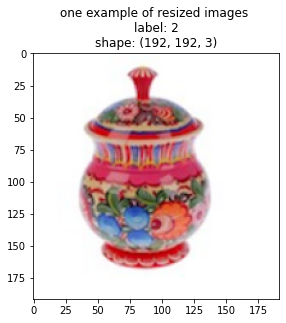

In [11]:
[x_train1,x_valid1,x_test1]=display_resize(
    x_train1,x_valid1,x_test1,y_valid1,img_size)

In [12]:
history=model.fit(x=x_train1,y=y_train1,batch_size=16,
                  epochs=50,callbacks=cb(model_weights),
                  validation_data=(x_valid1,y_valid1))

Train on 388 samples, validate on 48 samples
Epoch 1/50
384/388 [============================>.] - ETA: 0s - loss: 1.2454 - accuracy: 0.6641
Epoch 00001: val_accuracy improved from -inf to 0.41667, saving model to /checkpoints
388/388 [==============================] - 13s 33ms/sample - loss: 1.2572 - accuracy: 0.6649 - val_loss: 6.6639 - val_accuracy: 0.4167
Epoch 2/50
384/388 [============================>.] - ETA: 0s - loss: 0.8032 - accuracy: 0.7786
Epoch 00002: val_accuracy improved from 0.41667 to 0.43750, saving model to /checkpoints
388/388 [==============================] - 2s 5ms/sample - loss: 0.8036 - accuracy: 0.7784 - val_loss: 7.4920 - val_accuracy: 0.4375
Epoch 3/50
384/388 [============================>.] - ETA: 0s - loss: 0.7875 - accuracy: 0.8125
Epoch 00003: val_accuracy did not improve from 0.43750
388/388 [==============================] - 2s 5ms/sample - loss: 0.7929 - accuracy: 0.8119 - val_loss: 11.9296 - val_accuracy: 0.3750
Epoch 4/50
384/388 [===============

In [13]:
model.load_weights(model_weights)
model.evaluate(x_test1,y_test1,verbose=0)

[0.304886344136024, 0.8979592]

In [14]:
[handle_base,img_size]=['mobilenet_v2_140_224',224]
model_handle='https://tfhub.dev/google/imagenet/'+\
             '{}/feature_vector/4'.format(handle_base)

In [15]:
model=premodel(img_size,1024,model_handle,7)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1792)              4363712   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1836032   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 7175      
Total params: 6,206,919
Trainable params: 6,158,983
Non-trainable params: 47,936
_______________________________________

None

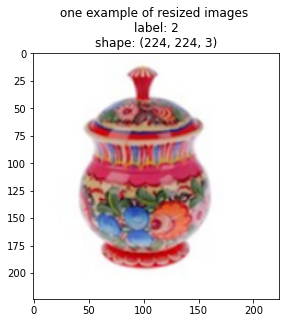

In [16]:
[x_train1,x_valid1,x_test1]=display_resize(
    x_train1,x_valid1,x_test1,y_valid1,img_size)

In [17]:
history=model.fit(x=x_train1,y=y_train1,batch_size=16,
                  epochs=50,callbacks=cb(model_weights),
                  validation_data=(x_valid1,y_valid1))

Train on 388 samples, validate on 48 samples
Epoch 1/50
384/388 [============================>.] - ETA: 0s - loss: 1.3023 - accuracy: 0.6094
Epoch 00001: val_accuracy improved from -inf to 0.64583, saving model to /checkpoints
388/388 [==============================] - 11s 28ms/sample - loss: 1.2932 - accuracy: 0.6134 - val_loss: 3.1074 - val_accuracy: 0.6458
Epoch 2/50
384/388 [============================>.] - ETA: 0s - loss: 0.7892 - accuracy: 0.8125
Epoch 00002: val_accuracy did not improve from 0.64583
388/388 [==============================] - 3s 7ms/sample - loss: 0.8059 - accuracy: 0.8093 - val_loss: 7.9436 - val_accuracy: 0.4375
Epoch 3/50
384/388 [============================>.] - ETA: 0s - loss: 1.1362 - accuracy: 0.7526
Epoch 00003: val_accuracy did not improve from 0.64583
388/388 [==============================] - 3s 7ms/sample - loss: 1.1397 - accuracy: 0.7474 - val_loss: 7.1378 - val_accuracy: 0.2917
Epoch 4/50
384/388 [============================>.] - ETA: 0s - loss: 

In [18]:
model.load_weights(model_weights)
print(model.evaluate(x_test1,y_test1,verbose=0))
del x_train1,x_valid1,x_test1,\
y_train1,y_valid1,y_test1

[0.2557297361140348, 0.9591837]


In [19]:
%radial_gradient_header Set #2
[handle_base,img_size]=['mobilenet_v2_050_96',96]
model_handle='https://tfhub.dev/google/imagenet/'+\
             '{}/feature_vector/4'.format(handle_base)

In [20]:
model=premodel(img_size,512,model_handle,33)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1280)              706224    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               655872    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 33)                16929     
Total params: 1,379,025
Trainable params: 1,360,481
Non-trainable params: 18,544
_______________________________________

None

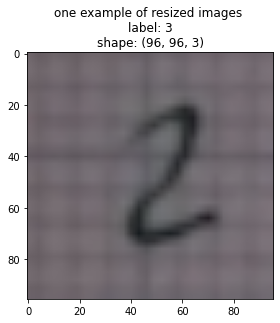

In [21]:
[x_train2,x_valid2,x_test2]=display_resize(
    x_train2,x_valid2,x_test2,y_valid2,img_size)

In [22]:
history=model.fit(x=x_train2,y=y_train2,batch_size=64,
                  epochs=70,callbacks=cb(model_weights),
                  validation_data=(x_valid2,y_valid2))

Train on 11352 samples, validate on 1419 samples
Epoch 1/70
11328/11352 [============================>.] - ETA: 0s - loss: 1.4585 - accuracy: 0.6012
Epoch 00001: val_accuracy improved from -inf to 0.52149, saving model to /checkpoints
11352/11352 [==============================] - 17s 2ms/sample - loss: 1.4579 - accuracy: 0.6011 - val_loss: 2.0207 - val_accuracy: 0.5215
Epoch 2/70
11264/11352 [============================>.] - ETA: 0s - loss: 0.4398 - accuracy: 0.8833
Epoch 00002: val_accuracy improved from 0.52149 to 0.81325, saving model to /checkpoints
11352/11352 [==============================] - 9s 805us/sample - loss: 0.4392 - accuracy: 0.8832 - val_loss: 0.7284 - val_accuracy: 0.8132
Epoch 3/70
11328/11352 [============================>.] - ETA: 0s - loss: 0.3114 - accuracy: 0.9230
Epoch 00003: val_accuracy improved from 0.81325 to 0.87385, saving model to /checkpoints
11352/11352 [==============================] - 9s 784us/sample - loss: 0.3110 - accuracy: 0.9231 - val_loss: 0

In [23]:
model.load_weights(model_weights)
print(model.evaluate(x_test2,y_test2,verbose=0))
del x_train2,x_valid2,x_test2,\
y_train2,y_valid2,y_test2

[0.1650066389593967, 0.9732206]


In [24]:
%radial_gradient_header Set #3
[handle_base,img_size]=['mobilenet_v1_100_128',128]
model_handle='https://tfhub.dev/google/imagenet/'+\
             '{}/feature_vector/4'.format(handle_base)

In [25]:
model=premodel(img_size,512,model_handle,10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1024)              3228864   
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 3,758,794
Trainable params: 3,736,906
Non-trainable params: 21,888
_______________________________________

None

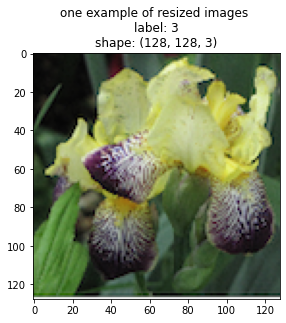

In [26]:
[x_train3,x_valid3,x_test3]=display_resize(
    x_train3,x_valid3,x_test3,y_valid3,img_size)

In [27]:
history=model.fit(x=x_train3,y=y_train3,batch_size=12,
                  epochs=50,callbacks=cb(model_weights),
                  validation_data=(x_valid3,y_valid3))

Train on 168 samples, validate on 21 samples
Epoch 1/50
156/168 [==========================>...] - ETA: 0s - loss: 2.2215 - accuracy: 0.4295
Epoch 00001: val_accuracy improved from -inf to 0.52381, saving model to /checkpoints
168/168 [==============================] - 5s 29ms/sample - loss: 2.1093 - accuracy: 0.4583 - val_loss: 3.6843 - val_accuracy: 0.5238
Epoch 2/50
144/168 [========================>.....] - ETA: 0s - loss: 0.8272 - accuracy: 0.7917
Epoch 00002: val_accuracy improved from 0.52381 to 0.76190, saving model to /checkpoints
168/168 [==============================] - 1s 4ms/sample - loss: 0.8434 - accuracy: 0.7738 - val_loss: 0.9513 - val_accuracy: 0.7619
Epoch 3/50
156/168 [==========================>...] - ETA: 0s - loss: 0.5431 - accuracy: 0.8654
Epoch 00003: val_accuracy did not improve from 0.76190
168/168 [==============================] - 0s 2ms/sample - loss: 0.5225 - accuracy: 0.8690 - val_loss: 1.0481 - val_accuracy: 0.7619
Epoch 4/50
156/168 [=================

In [28]:
model.load_weights(model_weights)
model.evaluate(x_test3,y_test3,verbose=0)

[0.5547462701797485, 0.8095238]

In [29]:
[handle_base,img_size]=['mobilenet_v2_130_224',224]
model_handle='https://tfhub.dev/google/imagenet/'+\
             '{}/feature_vector/4'.format(handle_base)

In [30]:
model=premodel(img_size,512,model_handle,10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1664)              3766048   
_________________________________________________________________
flatten_4 (Flatten)          (None, 1664)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               852480    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 4,623,658
Trainable params: 4,579,402
Non-trainable params: 44,256
_______________________________________

None

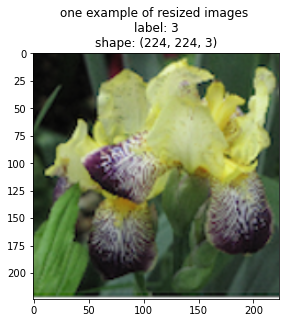

In [31]:
[x_train3,x_valid3,x_test3]=display_resize(
    x_train3,x_valid3,x_test3,y_valid3,img_size)

In [32]:
history=model.fit(x=x_train3,y=y_train3,batch_size=12,
                  epochs=50,callbacks=cb(model_weights),
                  validation_data=(x_valid3,y_valid3))

Train on 168 samples, validate on 21 samples
Epoch 1/50
156/168 [==========================>...] - ETA: 0s - loss: 1.9644 - accuracy: 0.3782
Epoch 00001: val_accuracy improved from -inf to 0.42857, saving model to /checkpoints
168/168 [==============================] - 13s 76ms/sample - loss: 1.9199 - accuracy: 0.3869 - val_loss: 2.8635 - val_accuracy: 0.4286
Epoch 2/50
156/168 [==========================>...] - ETA: 0s - loss: 0.9613 - accuracy: 0.7500
Epoch 00002: val_accuracy improved from 0.42857 to 0.52381, saving model to /checkpoints
168/168 [==============================] - 2s 10ms/sample - loss: 0.9558 - accuracy: 0.7560 - val_loss: 3.6046 - val_accuracy: 0.5238
Epoch 3/50
156/168 [==========================>...] - ETA: 0s - loss: 0.7853 - accuracy: 0.8013
Epoch 00003: val_accuracy did not improve from 0.52381
168/168 [==============================] - 1s 7ms/sample - loss: 0.8015 - accuracy: 0.7976 - val_loss: 6.5406 - val_accuracy: 0.2857
Epoch 4/50
156/168 [===============

In [33]:
model.load_weights(model_weights)
print(model.evaluate(x_test3,y_test3,verbose=0))
del x_train3,x_valid3,x_test3,\
y_train3,y_valid3,y_test3

[1.5040417909622192, 0.71428573]


In [34]:
%radial_gradient_header Set #4
[handle_base,img_size]=['mobilenet_v2_050_96',96]
model_handle='https://tfhub.dev/google/imagenet/'+\
             '{}/feature_vector/4'.format(handle_base)

In [35]:
model=premodel(img_size,512,model_handle,10)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   (None, 1280)              706224    
_________________________________________________________________
flatten_5 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               655872    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 1,367,226
Trainable params: 1,348,682
Non-trainable params: 18,544
_______________________________________

None

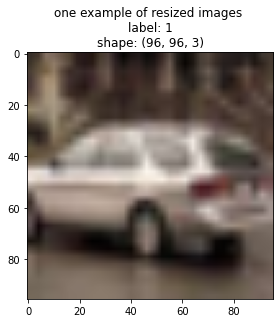

In [36]:
[x_train4,x_valid4,x_test4]=display_resize(
    x_train4,x_valid4,x_test4,y_valid4,img_size)

In [37]:
history=model.fit(x=x_train4,y=y_train4,batch_size=64,
                  epochs=10,callbacks=cb(model_weights),
                  validation_data=(x_valid4,y_valid4))

Train on 50000 samples, validate on 5000 samples
Epoch 1/10
49920/50000 [============================>.] - ETA: 0s - loss: 0.6444 - accuracy: 0.8041
Epoch 00001: val_accuracy improved from -inf to 0.76320, saving model to /checkpoints
50000/50000 [==============================] - 46s 911us/sample - loss: 0.6447 - accuracy: 0.8040 - val_loss: 0.7624 - val_accuracy: 0.7632
Epoch 2/10
49984/50000 [============================>.] - ETA: 0s - loss: 0.4555 - accuracy: 0.8665
Epoch 00002: val_accuracy improved from 0.76320 to 0.81400, saving model to /checkpoints
50000/50000 [==============================] - 39s 776us/sample - loss: 0.4554 - accuracy: 0.8665 - val_loss: 0.6247 - val_accuracy: 0.8140
Epoch 3/10
49920/50000 [============================>.] - ETA: 0s - loss: 0.3942 - accuracy: 0.8878
Epoch 00003: val_accuracy improved from 0.81400 to 0.85160, saving model to /checkpoints
50000/50000 [==============================] - 40s 792us/sample - loss: 0.3943 - accuracy: 0.8877 - val_los

In [38]:
model.load_weights(model_weights)
model.evaluate(x_test4,y_test4,verbose=0)

[0.49021889510154726, 0.8896]

In [39]:
#[handle_base,img_size]=['mobilenet_v2_075_96',96]
#model_handle='https://tfhub.dev/google/imagenet/'+\
#             '{}/feature_vector/4'.format(handle_base)

In [40]:
#model=premodel(img_size,1024,model_handle,10)

In [41]:
#history=model.fit(x=x_train4,y=y_train4,batch_size=64,
#                  epochs=10,callbacks=cb(model_weights),
#                  validation_data=(x_valid4,y_valid4))

In [42]:
model.load_weights(model_weights)
print(model.evaluate(x_test4,y_test4,verbose=0))

[0.49021889510154726, 0.8896]
